## Problem Definition
### 🆕 NEW: Added problem definition section

The goal of this project is to build a supervised machine learning model that can classify wines into three different cultivars (varieties) based on 13 chemical features:

**Chemical Features:**
- Alcohol
- Malic acid
- Ash
- Alkalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

This is a **multi-class classification** problem where the target variable is the wine cultivar (class 0, 1, or 2). The Wine dataset contains results from chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine_class'] = wine.target

## Dataset Description

The Wine dataset consists of 178 samples with:
- 13 numerical features (chemical measurements)
- 3 target classes (wine cultivars)

There are no missing values in the dataset. The features have different scales (e.g., alcohol is measured in percentage while proline is measured in mg/L), but logistic regression can handle this reasonably well.

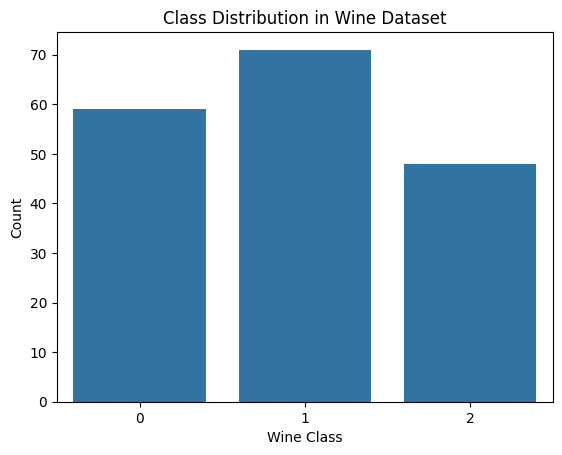

In [3]:
sns.countplot(x="wine_class", data=df)
plt.title("Class Distribution in Wine Dataset")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.show()

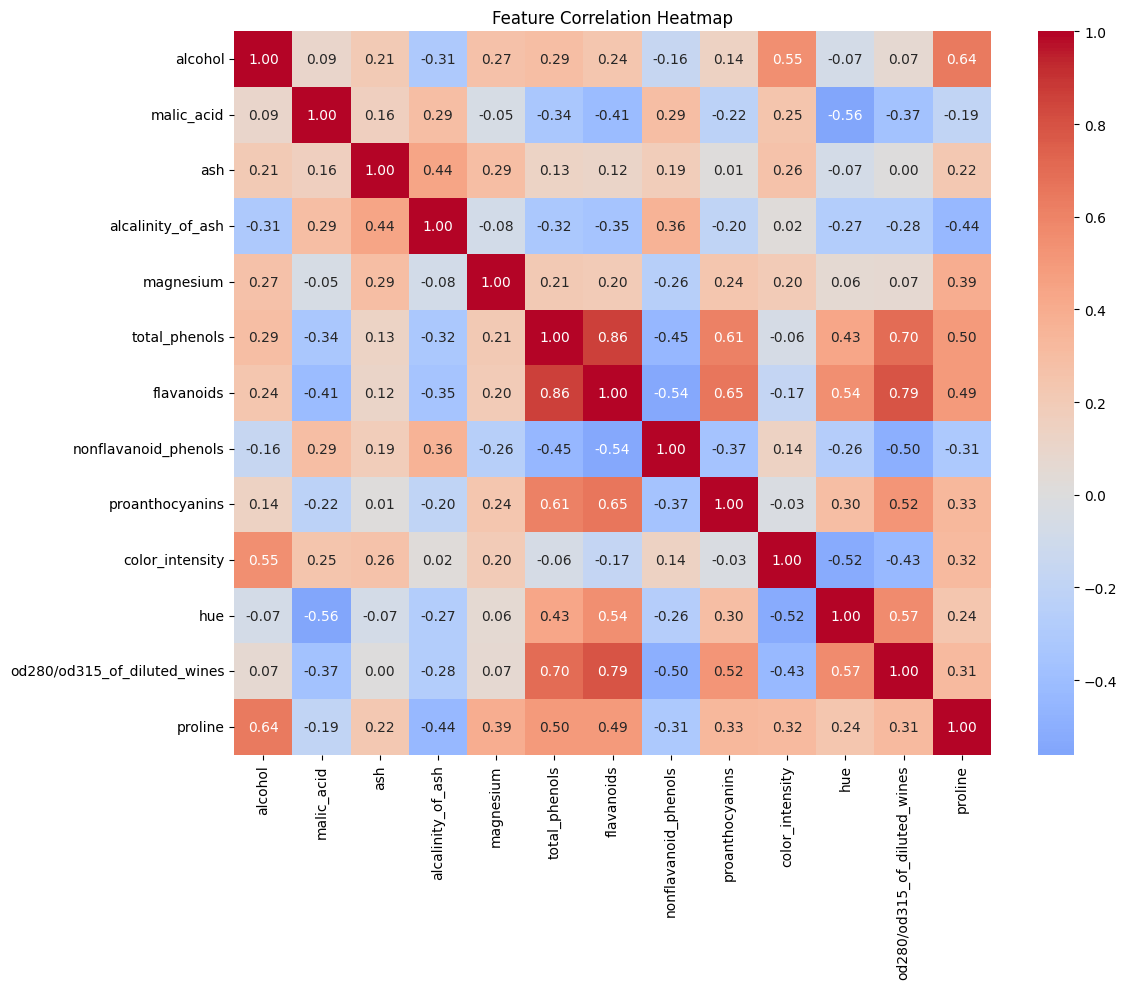

In [4]:
plt.figure(figsize=(12, 10))
correlation = df.drop('wine_class', axis=1).corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

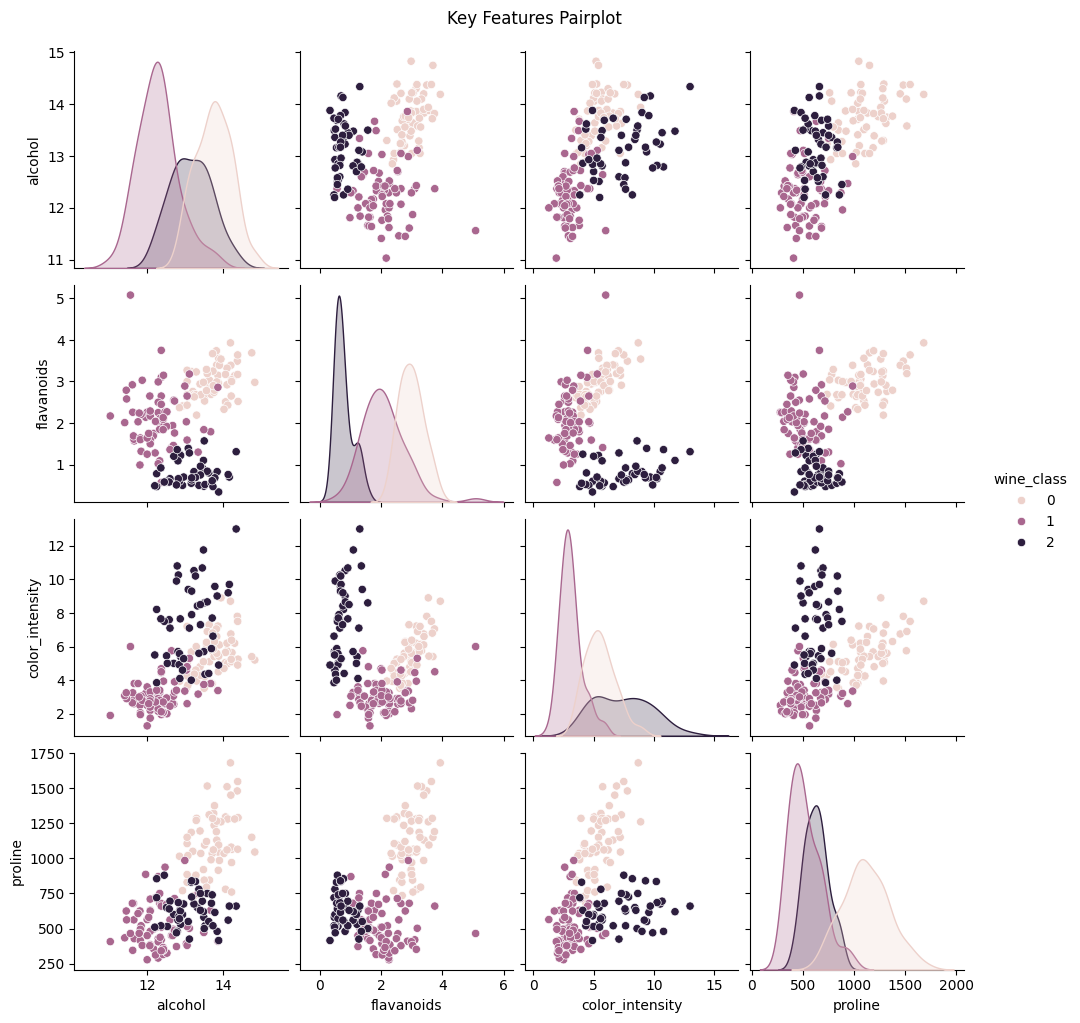

In [5]:
important_features = ['alcohol', 'flavanoids', 'color_intensity', 'proline', 'wine_class']
sns.pairplot(df[important_features], hue='wine_class', diag_kind='kde')
plt.suptitle("Key Features Pairplot", y=1.02)
plt.show()

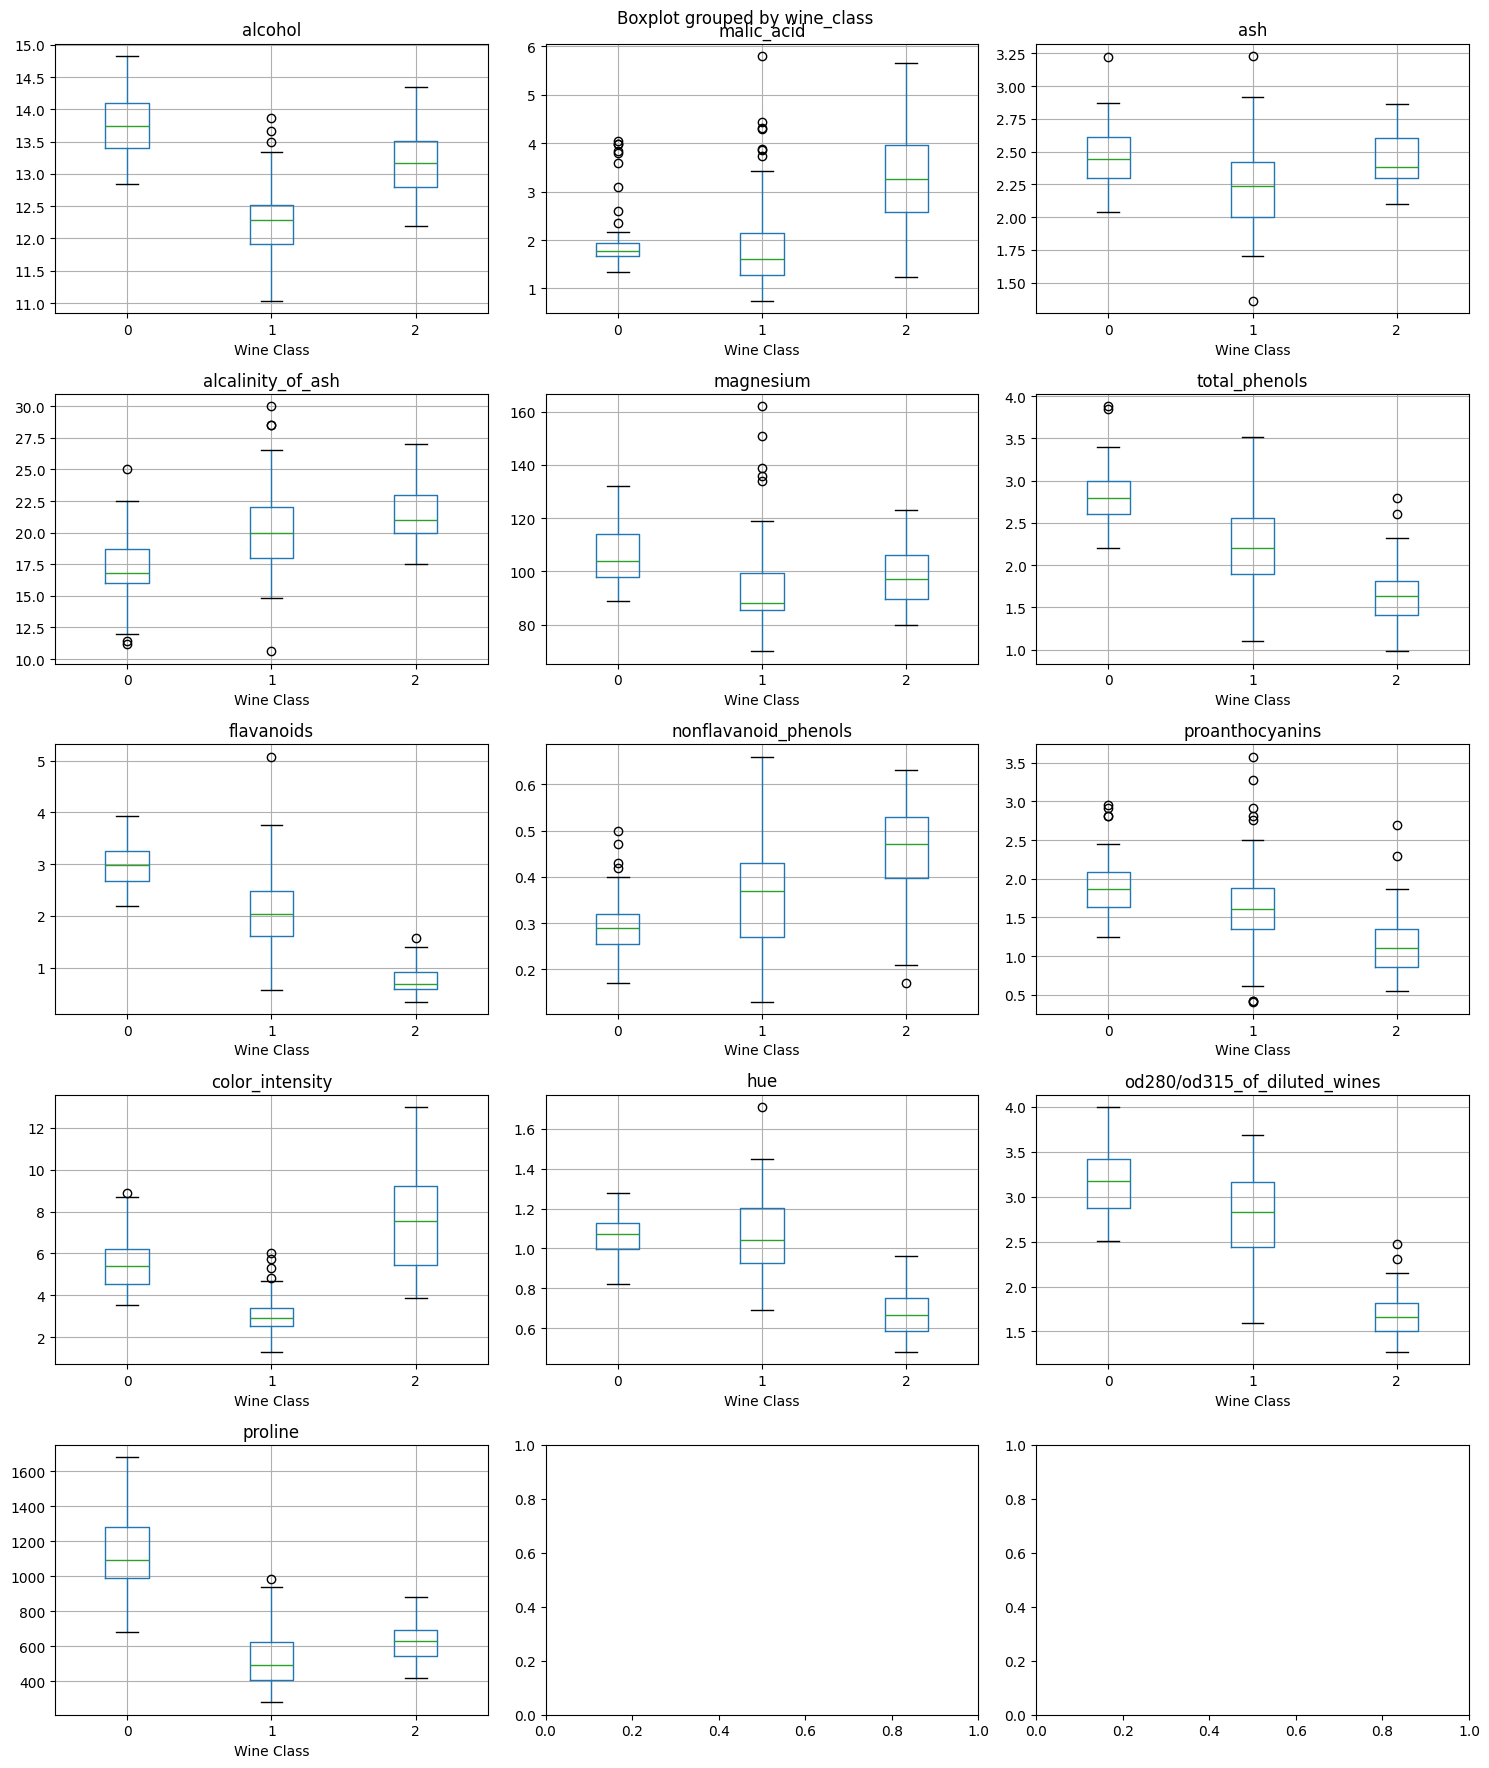

In [6]:
fig, axes = plt.subplots(5, 3, figsize=(15, 18))
features = [col for col in df.columns if col !='wine_class']

for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    df.boxplot(column=feature, by='wine_class', ax=ax)
    ax.set_title(feature)
    ax.set_xlabel("Wine Class")

plt.tight_layout()
plt.show()

In [7]:
df.info()
df.describe()
df['wine_class'].value_counts()

<class 'pandas.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_class      

wine_class
1    71
0    59
2    48
Name: count, dtype: int64

In [8]:
X = df.drop('wine_class', axis=1)
y = df['wine_class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Selection

Logistic Regression was chosen for this task because:

- It is well-suited for **classification problems**
- It supports **multi-class classification**
- It is easy to interpret compared to more complex models
- It performs well on linearly separable data such as the Wine dataset

Additionally, Logistic Regression allows us to analyze feature coefficients, which helps in understanding how each feature contributes to the prediction.


In [10]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.9722222222222222
[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



c:\Users\Vindiya\Documents\GitHub\WineClassification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


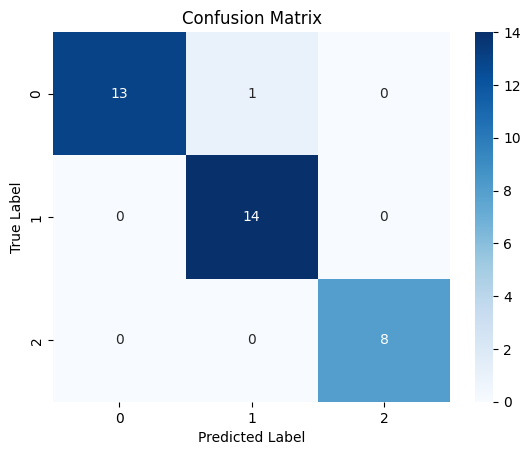

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

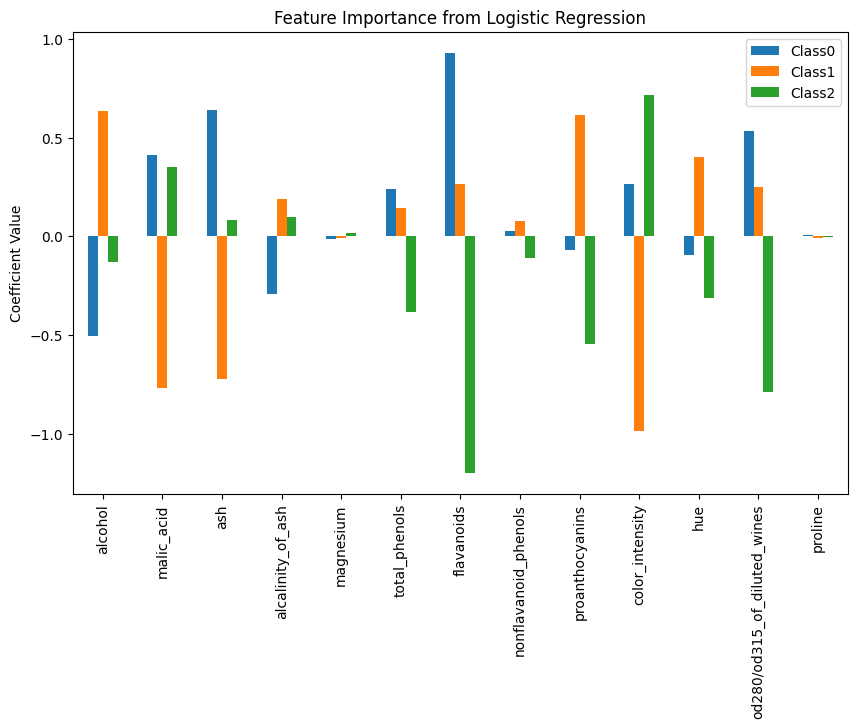

In [12]:
coefficient = pd.DataFrame(
    model.coef_.T,
    index=X.columns,
    columns=[f"Class{i}" for i in range(3)]
)

coefficient.plot(kind="bar", figsize=(10, 6))
plt.title("Feature Importance from Logistic Regression")
plt.ylabel("Coefficient Value")
plt.show()

## Model Evaluation Description

The Logistic Regression model achieved an accuracy of 97.2% on the test dataset, indicating strong predictive performance. The confusion matrix shows that the model correctly classified nearly all instances, with only one misclassification observed. Precision, recall, and F1-scores for all three classes were consistently high (≥ 0.93), demonstrating balanced and reliable classification across classes.

Although a convergence warning was raised due to the maximum number of iterations being reached, the model still produced stable and accurate predictions. This warning suggests that feature scaling could further improve optimization efficiency. Overall, the results indicate that Logistic Regression is well-suited for this classification task and generalizes effectively to unseen data.